In [112]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [113]:
%pip install openpyxl

In [114]:
df_assessments = pd.read_excel('Assessments.xlsx', sheet_name='Sheet0')

In [115]:
#Dictionary_CompletedStepsData files
completed_steps_data ={
    "C008":pd.read_csv("C008_SimpleStew_CompletedStepsData.csv"),
    "C009":pd.read_csv("C009_SimpleStew_CompletedStepsData.csv"),
    "C013":pd.read_csv("C013_SimpleStew_CompletedStepsData.csv"),
    "C016":pd.read_csv("C016_SimpleStew_CompletedStepsData.csv"),
    "C017":pd.read_csv("C017_SimpleStew_CompletedStepsData.csv"),
    "C021":pd.read_csv("C021_SimpleStew_CompletedStepsData.csv"),
    "C024":pd.read_csv("C024_SimpleStew_CompletedStepsData.csv"),
    "C025":pd.read_csv("C025_SimpleStew_CompletedStepsData.csv"),
    "C032":pd.read_csv("C032_SimpleStew_CompletedStepsData.csv"),
    "C033":pd.read_csv("C033_SimpleStew_CompletedStepsData.csv"),
    "C037":pd.read_csv("C037_SimpleStew_CompletedStepsData.csv"),
    "C040":pd.read_csv("C040_SimpleStew_CompletedStepsData.csv"),
    "C041":pd.read_csv("C041_SimpleStew_CompletedStepsData.csv"),
  
}
#Dictionary_MovementData files
movement_data ={
    "C008":pd.read_csv("C008_SimpleStew_MovementData.csv"),
    "C009":pd.read_csv("C009_SimpleStew_MovementData.csv"),
    "C013":pd.read_csv("C013_SimpleStew_MovementData.csv"),
    "C016":pd.read_csv("C016_SimpleStew_MovementData.csv"),
    "C017":pd.read_csv("C017_SimpleStew_MovementData.csv"),
    "C021":pd.read_csv("C021_SimpleStew_MovementData.csv"),
    "C024":pd.read_csv("C024_SimpleStew_MovementData.csv"),
    "C025":pd.read_csv("C025_SimpleStew_MovementData.csv"),
    "C032":pd.read_csv("C032_SimpleStew_MovementData.csv"),
    "C033":pd.read_csv("C033_SimpleStew_MovementData.csv"),
    "C037":pd.read_csv("C037_SimpleStew_MovementData.csv"),
    "C040":pd.read_csv("C040_simpleStew_MovementData.csv"),
    "C041":pd.read_csv("C041_SimpleStew_MovementData.csv"),
}

In [116]:
#Total Completion time for each participant_CompletedStepsData
total_completion_times={}
for participant_id, df in completed_steps_data.items():
    total_completion_times[participant_id]=df['Session Time'].max()-df['Session Time'].min()


In [117]:
df_total_times=pd.DataFrame(list(total_completion_times.items()), columns=['Subject ID','Total Completion Time'])

In [118]:
merged_data = pd.merge(df_assessments, df_total_times, left_on="TOPF\nSubject ID", right_on="Subject ID")

In [119]:
#Descriptive Statistics
descriptive_stats = merged_data['Block Design Score'].describe()
print(descriptive_stats)

count    13.000000
mean     39.307692
std      12.324668
min      24.000000
25%      30.000000
50%      36.000000
75%      48.000000
max      63.000000
Name: Block Design Score, dtype: float64


In [120]:
print(df_total_times)

   Subject ID  Total Completion Time
0        C008             303.678936
1        C009             319.561768
2        C013             397.384106
3        C016             176.589169
4        C017             257.510086
5        C021             359.111984
6        C024             176.902380
7        C025             299.278427
8        C032             189.060985
9        C033             309.952225
10       C037             357.691284
11       C040             233.624506
12       C041             269.683659


In [121]:
#Spearman correlation analysis
correlation_coefficient, p_value = stats.spearmanr(merged_data['Block Design Score'],merged_data['Total Completion Time'])
print(f"Spearman Correlation Coefficient: {correlation_coefficient}, P-value:{p_value}")

Spearman Correlation Coefficient: -0.3581280806895406, P-value:0.22955311065522566


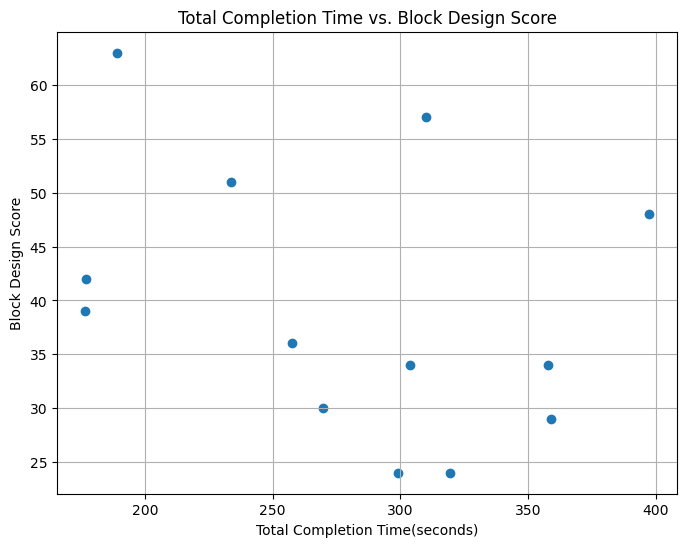

In [122]:
#Scatter Plot
plt.figure(figsize=(8,6))
plt.scatter(merged_data['Total Completion Time'],merged_data['Block Design Score'])
plt.title('Total Completion Time vs. Block Design Score')
plt.xlabel('Total Completion Time(seconds)')
plt.ylabel('Block Design Score')
plt.grid(True)
plt.show()

In [123]:
#Linear fit for the data
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Total Completion Time'], merged_data['Block Design Score'])
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}")

Slope: -0.05623245127018352, Intercept: 55.096162064382234, R-squared: 0.10723714419667951


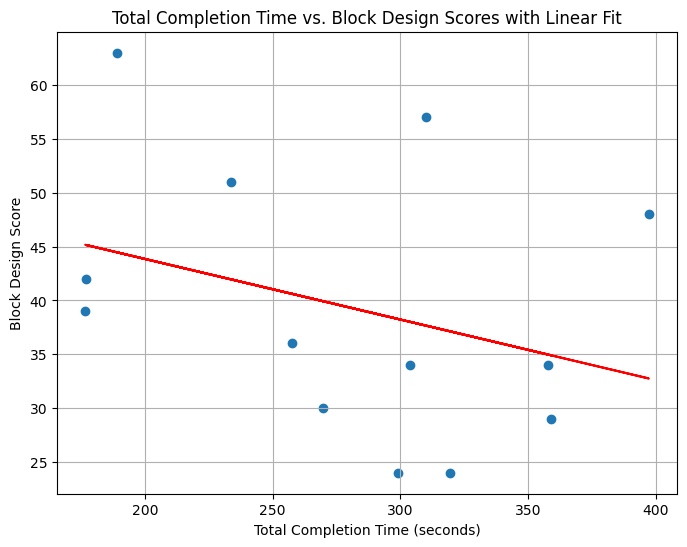

In [124]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Total Completion Time'], merged_data['Block Design Score'])
plt.plot(merged_data['Total Completion Time'], slope * merged_data['Total Completion Time'] + intercept, color='red') 
#linear line
plt.title('Total Completion Time vs. Block Design Scores with Linear Fit')
plt.xlabel('Total Completion Time (seconds)')
plt.ylabel('Block Design Score')
plt.grid(True)
plt.show()

In [125]:
import numpy as np


In [126]:
#Motion Controller Jitter for each participant
motion_controller_jitter = {}

for participant_id, df in movement_data.items():
    initial_rows = df[
        (df['MotionControllerLeft_LOCATION_X'] == df['MotionControllerLeft_LOCATION_X'].iloc[0]) &
        (df['MotionControllerLeft_LOCATION_Y'] == df['MotionControllerLeft_LOCATION_Y'].iloc[0]) &
        (df['MotionControllerLeft_LOCATION_Z'] == df['MotionControllerLeft_LOCATION_Z'].iloc[0]) &
        (df['MotionControllerRight_LOCATION_X'] == df['MotionControllerRight_LOCATION_X'].iloc[0]) &
        (df['MotionControllerRight_LOCATION_Y'] == df['MotionControllerRight_LOCATION_Y'].iloc[0]) &
        (df['MotionControllerRight_LOCATION_Z'] == df['MotionControllerRight_LOCATION_Z'].iloc[0])
    ].index

    df = df.drop(initial_rows).reset_index(drop=True)

# Velocity
    for hand in ['Left', 'Right']:
        for axis in ['X', 'Y', 'Z']:
            df[f'{hand}Hand_Velocity_{axis}'] = df[f'MotionController{hand}_LOCATION_{axis}'].diff() / df['Times'].diff()

# Jitter Calculation
    jitter_values = []
    for hand in ['Left', 'Right']:
        for axis in ['X', 'Y', 'Z']:
            jitter_values.append(df[f'{hand}Hand_Velocity_{axis}'].std())

# Average Jitter across all axes and hands
    average_jitter = np.mean(jitter_values)

    motion_controller_jitter[participant_id] = average_jitter

#DataFrame from the jitter data
df_jitter = pd.DataFrame(list(motion_controller_jitter.items()), columns=['Subject ID', 'Motion Controller Jitter'])

# Merging jitter data with existing merged_data
merged_data = pd.merge(merged_data, df_jitter, left_on="TOPF\nSubject ID", right_on="Subject ID")


In [127]:
#Spearman correlation analysis for Motion Controller Jitter
correlation_coefficient_jitter, p_value_jitter = stats.spearmanr(merged_data['Block Design Score'], merged_data['Motion Controller Jitter'])
print(f"Spearman Correlation Coefficient (Block Design vs. Jitter): {correlation_coefficient_jitter:.3f}, P-value:{p_value_jitter:.3f}")

Spearman Correlation Coefficient (Block Design vs. Jitter): -0.025, P-value:0.936


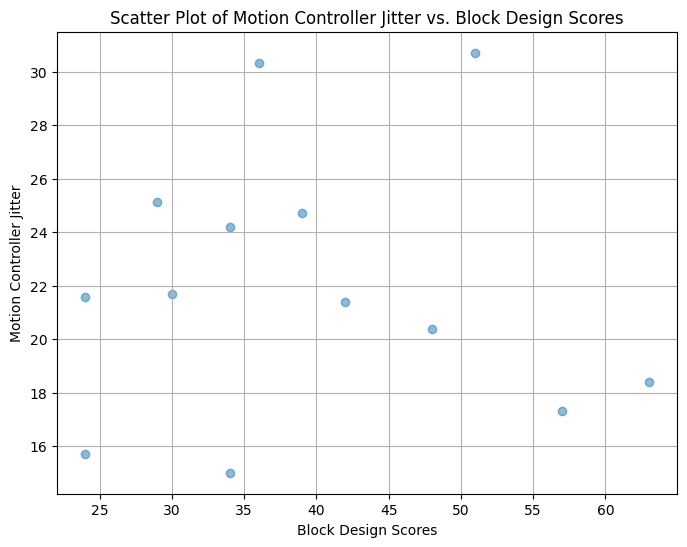

In [128]:
#Scatter plot for Motion Controller Jitter
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Block Design Score'], merged_data['Motion Controller Jitter'], alpha=0.5)
plt.title('Scatter Plot of Motion Controller Jitter vs. Block Design Scores')
plt.xlabel('Block Design Scores')
plt.ylabel('Motion Controller Jitter')
plt.grid(True)

In [129]:
#linear fit for the data (Motion Controller Jitter and Block Design scores)
slope_jitter, intercept_jitter, r_value_jitter, p_value_linreg_jitter, std_err_jitter = stats.linregress(merged_data['Block Design Score'], merged_data['Motion Controller Jitter'])
print(f"Linear Regression (Jitter): slope = {slope_jitter:.3f}, intercept = {intercept_jitter:.3f}, R^2 = {r_value_jitter**2:.3f}, p = {p_value_linreg_jitter:.3f}")


Linear Regression (Jitter): slope = -0.007, intercept = 22.305, R^2 = 0.000, p = 0.957


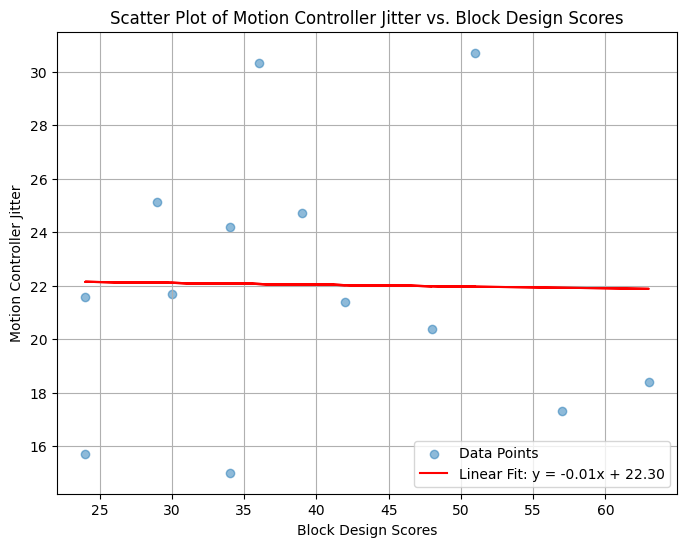

Linear Regression (Jitter): slope = -0.007, intercept = 22.305, R^2 = 0.000, p = 0.957


In [130]:
# Scatter plot with linear fit for Motion Controller Jitter
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Block Design Score'], merged_data['Motion Controller Jitter'], alpha=0.5, label='Data Points')

#linear fit
slope_jitter, intercept_jitter, r_value_jitter, p_value_linreg_jitter, std_err_jitter = stats.linregress(merged_data['Block Design Score'], merged_data['Motion Controller Jitter'])
x_values_jitter = merged_data['Block Design Score'].values
y_values_jitter = slope_jitter * x_values_jitter + intercept_jitter
plt.plot(x_values_jitter, y_values_jitter, color='red', label=f'Linear Fit: y = {slope_jitter:.2f}x + {intercept_jitter:.2f}')
plt.title('Scatter Plot of Motion Controller Jitter vs. Block Design Scores')
plt.xlabel('Block Design Scores')
plt.ylabel('Motion Controller Jitter')
plt.legend()
plt.grid(True)
plt.show()

#regression statistics
print(f"Linear Regression (Jitter): slope = {slope_jitter:.3f}, intercept = {intercept_jitter:.3f}, R^2 = {r_value_jitter**2:.3f}, p = {p_value_linreg_jitter:.3f}")
